In [1]:
import numpy as np
import torch
import scipy.sparse as sp
import pandas as pd
import math
import random
from sklearn.preprocessing import minmax_scale, scale
import matplotlib.pyplot as plt
from sklearn import metrics
from itertools import cycle

/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# PR_plot = {}
PR_plot = np.load('./PR_plot.npy', allow_pickle=True).item()

In [8]:
PR_plot.keys()

dict_keys(['peryton_sign2', 'peryton_sign1', 'greet', 'trustsgcn', 'gatmda', 'slgnn'])

In [4]:
suf = 'slgnn'
folds = np.load('../'+suf+'_embedding_peryton_folds.npy', allow_pickle=True).item()

In [5]:
y_real = []
y_proba = []
for name, yp in zip(folds.keys(), folds.values()):
    y_real.append(yp[0].ravel())
    y_proba.append(yp[1].ravel())
y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision, recall, _ = metrics.precision_recall_curve(y_real, y_proba)
aupr = metrics.auc(recall, precision)
PR_plot[suf] = (recall, precision, aupr)

In [6]:
PR_plot.keys()
np.save('./PR_plot.npy', PR_plot)

In [9]:
data = np.load('./PR_plot.npy', allow_pickle=True).item()

In [10]:
names = list(data.keys())
names

['peryton_sign2', 'peryton_sign1', 'greet', 'trustsgcn', 'gatmda', 'slgnn']

In [11]:
names_1 = ['sign2', 'sign1', 'greet', 'trustsgcn', 'gatmda', 'slgnn']

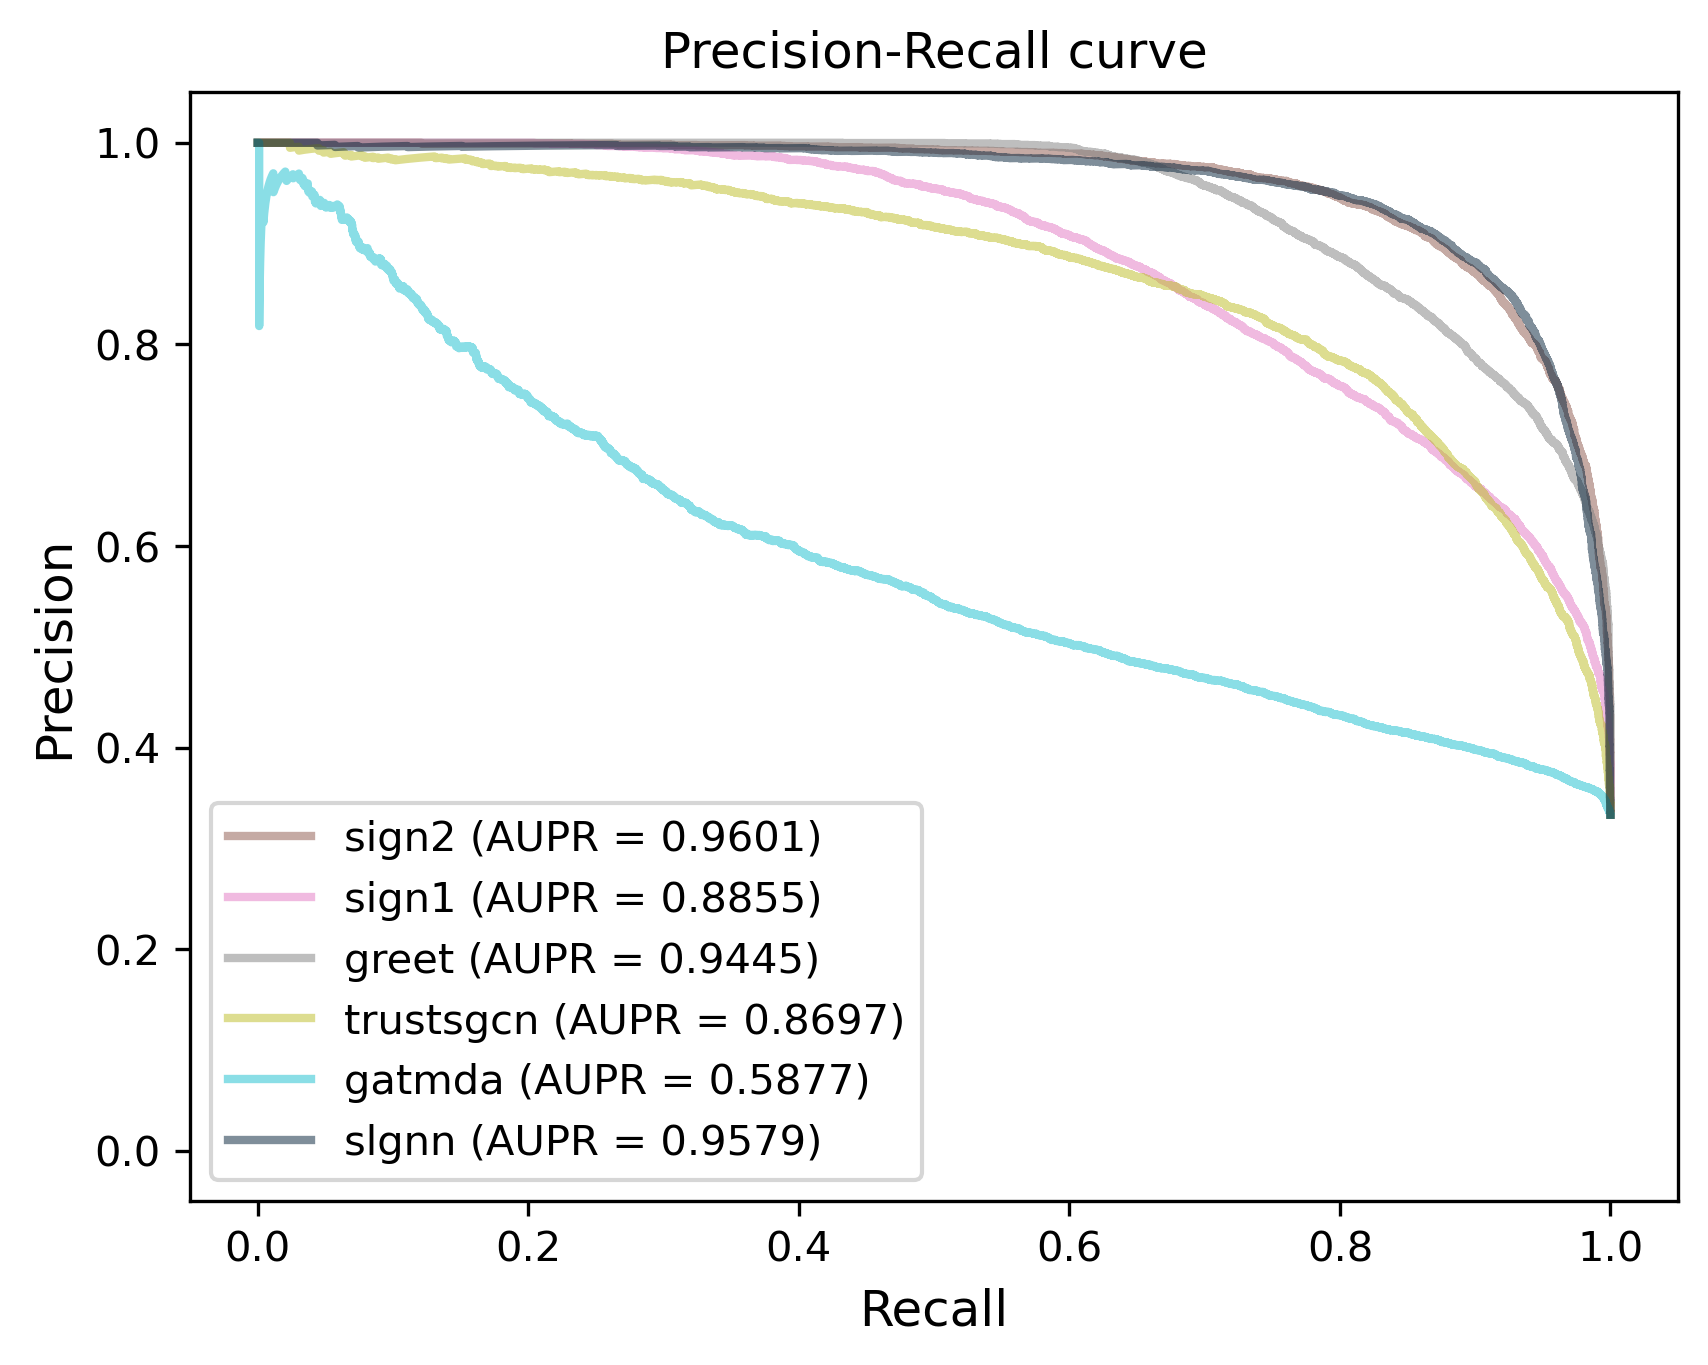

In [12]:
c = cycle([ # 使用颜色编码定义颜色
            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#001e36'])
fig, ax = plt.subplots(dpi=300) # 指定大小分辨率等，相当于画纸
for i, (item, color) in enumerate(zip(names, c)):
    ax.plot(data[item][0], data[item][1], color=color, lw=2, alpha=.5,
            label=str(names_1[i]) + ' (AUPR = %0.4f)' % data[item][2])
    
ax.set_xlabel('Recall', size=12)
ax.set_ylabel('Precision', size=12)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
    title="Precision-Recall curve")
ax.legend(loc="lower left")
plt.savefig('./PR.tiff', dpi=300)

In [ ]:
c = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  # 使用颜色编码定义颜色
            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#001e36'])

y_real = []
y_proba = []
auprs = []
fig, ax = plt.subplots(dpi=300) # 指定大小分辨率等，相当于画纸
for toolsName, y_trueANDpred_proba, color in zip(folds.keys(), folds.values(), c):
    precision, recall, _ = metrics.precision_recall_curve(y_trueANDpred_proba[0].ravel(),
                                                            y_trueANDpred_proba[1].ravel())
    aupr = metrics.auc(recall, precision)  # 计算面积的
    auprs.append(aupr)
    ax.plot(recall, precision, color=color, label=str(toolsName) + ' (AUPR = %0.4f)' % aupr,
                lw=2, alpha=.5)  # 横纵坐标的取值，颜色样式等
    y_real.append(y_trueANDpred_proba[0].ravel())
    y_proba.append(y_trueANDpred_proba[1].ravel())
y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision, recall, _ = metrics.precision_recall_curve(y_real, y_proba)
std_aupr = np.std(auprs)
lab = 'Overall (AUPR=%.4f $ \pm$ %0.4f)' % (metrics.auc(recall, precision), std_aupr)
ax.plot(recall, precision, color='#3333ab', label=lab, lw=2, )  # 横纵坐标的取值，颜色样式等
ax.set_xlabel('Recall', size=12)
ax.set_ylabel('Precision', size=12)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
    title="Precision-Recall curve")
ax.legend(loc="lower left")